## Title: Project 7: Apply Supervised Machine Learning - Simple Linear Regression
### Author: Tesfamariam
### Link: https://github.com/Tesfamariam100/datafun-07-applied


### dependancies


In [72]:
import matplotlib
from matplotlib import pyplot as plt
import pandas
import pyarrow
import scipy
from scipy import stats
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np

### Part 1 - Chart a Straight Line

#### Linear Relationships

Linear relationships exist between Fahrenheit and Celsius temperatures, where Celsius (dependent variable) is determined by Fahrenheit (independent variable) through the formula c = 5/9 ×(f−32). Plotting Fahrenheit against Celsius yields a straight line, demonstrated by computing Celsius equivalents for Fahrenheit temperatures 0–100 in 10-degree intervals and storing them as tuples in 'temps'

#### Visualizing Fahrenheit and Celsius Temperature Relationships

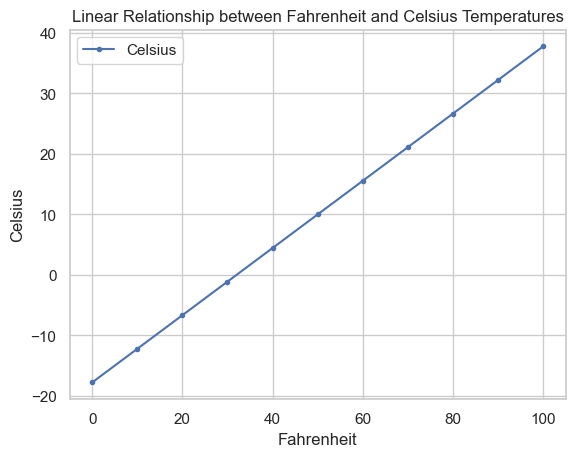

In [73]:
c = lambda f: 5 / 9 * (f - 32)

temps = [(f, c(f)) for f in range(0, 101, 10)]
[(f, c(f)) for f in range(0, 101, 10)]

#place the data in a DataFrame
import pandas as pd
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')
plt.title('Linear Relationship between Fahrenheit and Celsius Temperatures')

# Add a grid
plt.grid(True)

## (Part 2) - Predict Avg High Temp in NYC in January 

### Section 1 - Data Acquisition

In [74]:
#loading and displaying the New York City data from ave_hi_nyc_jan_1895-2018.csv
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


### Section 2 - Data Inspection

Examine the DataFrame’s head and tail to understand the data:

In [75]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [76]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

Seaborn will graph Date-Value pairs and a regression line, automatically labeling axes using DataFrame column names. To enhance readability, we'll change the name of the 'Value' column to 'Temperature'.

In [77]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


### Section 2 - Data Inspection

Seaborn labels x-axis tick marks with Date values. To improve readability for January temperatures, we'll remove "01" from each Date.

In [78]:
nyc.Date.dtype

dtype('int64')

checking the column type ('int64') which is integer, dividing by 100 removes the last two digits.

In [79]:
# Using the Series method floordiv applies integer division to each element within the Series:

nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)


,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics

To obtain quick statistics regarding the dataset's temperatures, use the `describe` function on the 'Temperature' column. 

In [80]:
### Calculating Basic Descriptive Statistics

# Set precision to 2 decimal places
pd.set_option('display.precision', 2)

# Calculate basic descriptive statistics using describe
nyc['Temperature'].describe()


count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

Use the SciPy stats module's linregress function to calculate the slope and intercept for the best fit line through the data.



In [81]:
# Calculate the slope and intercept of the regression line
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)
# Obtain the slope of the linear regression
linear_regression.slope

0.014771361132966163

In [82]:
# Linear Regression Intercept
linear_regression.intercept

8.694993233674289

### Section 6 - Predict

Utilize your model to predict the "average high temperature in January" for the year 2024, similar to the process done for 2019.


In [83]:
# Predict the average high temperature in January for the year 2024 using the linear regression model
linear_regression.slope * year_2024 + linear_regression.intercept
predicted_temperature_2024

38.5922281667978

In [84]:
# We also can approximate what the average temperature might have been in the years before 1895.

linear_regression.slope * 1890 + linear_regression.intercept


36.612865774980335

In [85]:
# We should expect predictions become less reliable as you move further beyond this range.

### Section 7 - Visualizations

Plotting Average High Temperatures and Regression Line:
Using Seaborn regplot function we'll visualize data points with dates on the x-axis and temperatures on the y-axis. Blue dots represent temperatures for dates, while a straight regression line runs through the points.


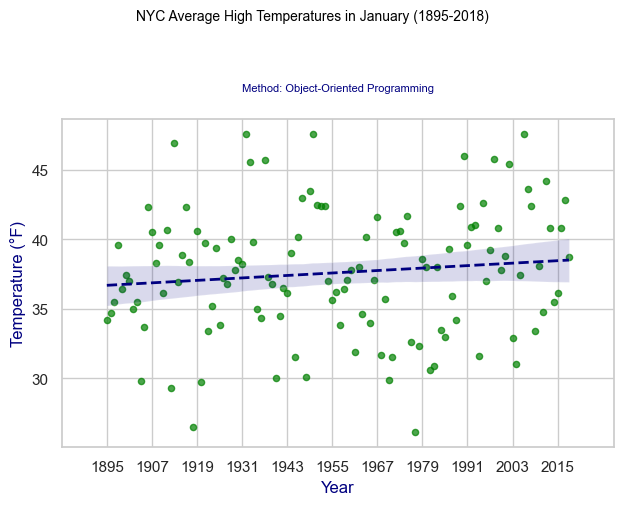

In [86]:

# Set Seaborn theme and customize scatter plot and regression line
sns.set_theme(style='whitegrid')

# Create the scatter plot with regplot
axes = sns.regplot(x='Date', y='Temperature', data=nyc,
                   scatter_kws={"color": "green", "alpha": 0.7, "s": 20, "marker": "o"},
                   line_kws={"color": "navy", "lw": 2, "ls": "--"})

# Add title, subtitle, and labels to the plot
plt.suptitle('NYC Average High Temperatures in January (1895-2018)', fontsize=10, color='Black', y=1.05)
axes.set_title('Method: Object-Oriented Programming', fontsize=8, color='navy', pad=20)
axes.set_xlabel('Year', fontsize=12, color='navy')
axes.set_ylabel('Temperature (°F)', fontsize=12, color='navy')

# Customize ticks and extend the chart horizontally
axes.set_xticks(range(min(nyc.Date), max(nyc.Date), 12)) 
axes.set_xlim(min(nyc.Date) - 12, max(nyc.Date) + 12)

# Display the plot
plt.tight_layout()
plt.show()


**Analysis:**
NYC January High Temperature Trends (1895-2018)

The plot illustrates a generally increasing trend in average high temperatures in January for NYC from 1895 to 2018, with some fluctuations observed over the years.